In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sp

In [192]:
#Brewster's Angle

n = np.arctan(51)

#Define curves
def cos(theta,I_0,theta0,offset):
    return I_0 * np.cos(np.radians((theta - theta0)))**2 + offset

def cos2(theta,I_0,theta0,offset):
    return I_0 * np.cos(np.radians(2*(theta - theta0)))**2 + offset

def fresnel_s(theta, E_p, I_0, n, epsilon=1e-4):
    theta_rad = np.radians(theta)
    
    small_angle_mask = np.abs(theta_rad) < epsilon
    large_angle_mask = ~small_angle_mask
    
    result = np.zeros_like(theta_rad)
    
    result[small_angle_mask] = I_0 + E_p * (theta_rad[small_angle_mask] ** 2) / 2
    
    refracted_theta = np.arcsin(np.sin(theta_rad[large_angle_mask]) / n)
    result[large_angle_mask] = (
        E_p * np.tan(theta_rad[large_angle_mask] - refracted_theta) / 
        np.tan(theta_rad[large_angle_mask] + refracted_theta) + I_0
    )
    
    return result

def fresnel_p(theta,offset,n=1.5, epsilon=1e-7):
    # Ensure theta is a numpy array
    theta = np.asarray(theta-offset)
    
    # Convert theta to radians
    theta_rad = np.radians(theta)
    
    # Initialize the result array
    result = np.zeros_like(theta_rad)

    # Calculate sin(theta) / n for large angles
    sin_theta_over_n = np.sin(theta_rad) / n

    # Calculate Brewster's angle as a single value
    brewsters_angle = np.arctan(n)
    
    # Identify angles close to Brewster's angle within a small tolerance
    brewster_mask = np.isclose(theta_rad, brewsters_angle, atol=epsilon).astype(bool)
    
    # Set result to 0 at Brewster's angle
    result[brewster_mask] = 0
    
    # Mask for angles that are neither small nor Brewster's angle
    non_brewster_mask = (~brewster_mask).astype(bool)
    
    # For non-critical angles, proceed with the normal Fresnel calculation
    if np.any(non_brewster_mask):
        refracted_theta = np.zeros_like(sin_theta_over_n[non_brewster_mask])
        
        refracted_theta= np.arcsin(sin_theta_over_n[non_brewster_mask])
        
        result[non_brewster_mask] = I_0*np.abs(
            np.tan(theta_rad[non_brewster_mask] - refracted_theta) / 
            np.tan(theta_rad[non_brewster_mask] + refracted_theta)
        )
    return result

In [193]:
#Error analysis

#Error for Experiment 1
#Sources of Error: Alignment of setup (1%) + Reading of halfwave plate (+- 0.5 / 199) + Reading of Spectrometer arm (+-0.25/90) + Analyser readings from 0 to 180

x0 = np.linspace(10,180,18)
analyser_error_exp1 = [0.5/i for i in x0]
rms_analyser_exp1 = np.sqrt(np.mean(np.square(analyser_error_exp1)))

exp1_err = np.sqrt(0.01**2+(0.5/199)**2+(0.25/90)**2+rms_analyser_exp1**2)

#Error for Experiment 2
#Sources of Error: Alignment of setup (1%) + Reading of halfwave plate (+- 0.5/199) + Analyser readings from 0 to 90

x1 = np.linspace(10,90,9)
analyser_error_exp2n3 = [0.5/i for i in x1]
rms_analyser_exp2n3 = np.sqrt(np.mean(np.square(analyser_error_exp2n3)))

exp2n3_err = np.sqrt(0.01**2 + (0.5/199)**2+rms_analyser_exp2n3**2)

#Error for Experiment 4a
#Sources of Error: Alignment of setup (1%) + Table reading (0.25/330) + Table reading 2 (0.25/21) + half wave plate reading (0.5/334)
 
exp4brewsters_err = np.sqrt(0.01**2+(0.25/330)**2+(0.25/21)**2+(0.5/334)**2)
print(exp4brewsters_err)

#Error for Experiment 4b
#Sources for Error: Table reading (0.25/21.66) + Intensity (0.05/75.4) + Background reading (0.05/7.9) + Table reading 2 (0.25/226) + Arm (0.25/306) + Table rotation from 0 to 30 degrees

x2 = np.linspace(5,30,6)
table_error_exp4 = [0.25/i for i in x2]
rms_table_exp4 = np.sqrt(np.mean(np.square(table_error_exp4)))

exp4bv_error = np.sqrt((0.25/21.66)**2+(0.05/75.4)**2+(0.05/7.9)**2+(0.25/226)**2+(0.25/306)**2+rms_table_exp4**2)
exp4bh_error = np.sqrt((0.25/21.66)**2+(0.05/55.3)**2+(0.05/4.4)**2+(0.25/227)**2+(0.25/306)**2+rms_table_exp4**2)

#Error for Experiment 4c
#Sources of Error: Alignment of setup (1%) + Table reading error (+-0.25/20) + Halfwave plate (0.5/221.5) + 1 Analyser Reading (0.5/312) or (0.5/236)
exp4_20_error = np.sqrt(0.01**2+(0.25/20)**2+(0.5/221.5)**2+(0.5/312)**2)
exp4_80_error = np.sqrt(0.01**2+(0.25/20)**2+(0.5/221.5)**2+(0.5/236)**2)

#Error for Experiment 5
#Sources of error: Waveplate reading (0.5/221.5) + Analyser reading (0.5/235) or (0.5/315) + Table reading (0.5/22.66) or (0.5/14)
exp5_20_error = np.sqrt((0.5/221.5)**2+(0.5/235)**2+(0.5/22.6)**2+rms_analyser_exp1**2)
exp5_79_error = np.sqrt((0.5/221.5)**2+(0.5/315)**2+(0.5/14)**2+rms_analyser_exp1**2)



0.01563772054890726


In [194]:
ajax = pd.read_csv('taskAajax.csv')
dettol = pd.read_csv('taskAdettol.csv')
malus = pd.read_csv('polarisation.csv')
quarter = pd.read_csv('taskAquarter.csv')
circular = pd.read_csv('taskBcircular.csv')
horizontal = pd.read_csv('taskBhorizontal.csv')
vertical = pd.read_csv('taskBvertical.csv')
metal20 = pd.read_csv('metal20.csv')
metal79 = pd.read_csv('metal79.csv')

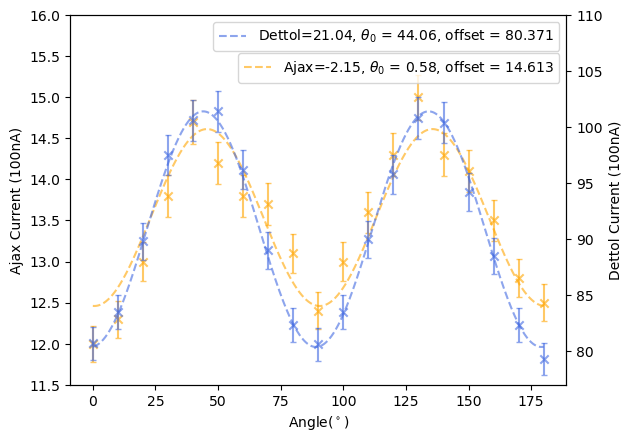

In [195]:
x = ajax['Angle']
y1 = ajax['Current (100nA)']
y2 = dettol['Current (100nA)']
x_smooth = np.linspace(x.min(),x.max(),10000)

fig, ax1 = plt.subplots()

ax1.scatter(x,y1,color='orange',marker='x',alpha=0.6)
ax1.set_xlabel(r'Angle($^\circ$)')
ax1.set_ylabel('Ajax Current (100nA)')

param1,covariance1 = sp.curve_fit(cos2,x,y1)

y_smooth1 = cos2(x_smooth,*param1)
ax1.plot(x_smooth,
         y_smooth1,
         label=rf'Ajax={param1[0]:.2f}, $\theta_0$ = {param1[1]:.2f}, offset = {param1[2]:.3f}',
         linestyle='--',
         color='orange',
         alpha=0.6)
ax1.legend(loc='upper right', bbox_to_anchor=(1,0.915))
ax1.set_ylim(11.5,16)
ax1.errorbar(x,y1,yerr=exp1_err*y1,color='orange',capsize=2,fmt='none',alpha=0.6)
ax2 = ax1.twinx()
ax2.scatter(x,y2,color='royalblue',marker='x',alpha=0.6)

param2,covariance2 = sp.curve_fit(cos2,x,y2)
y_smooth2 = cos2(x_smooth,*param2)
ax2.plot(x_smooth,
         y_smooth2,
         label=rf'Dettol={param2[0]:.2f}, $\theta_0$ = {param2[1]:.2f}, offset = {param2[2]:.3f}',
         linestyle='--',
         color='royalblue',
         alpha=0.6)
ax2.set_ylabel('Dettol Current (100nA)')
ax2.legend(loc='upper right',bbox_to_anchor=(1,1))
ax2.set_ylim(77,110)
ax2.errorbar(x,y2,yerr=exp1_err*y2,color='royalblue',capsize=2,fmt='none',alpha=0.6)

plt.savefig("experiment1.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

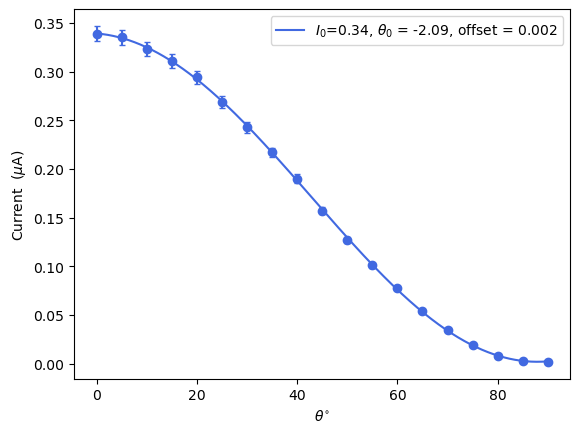

In [196]:
x = malus['Angle (degrees)']
y = malus['Current (micro amps)']

param,covariance = sp.curve_fit(cos,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = cos(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}',
    color='royalblue'
)

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=exp2n3_err*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current  ($\mu$A)')


plt.legend()
plt.savefig("maluslaw.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

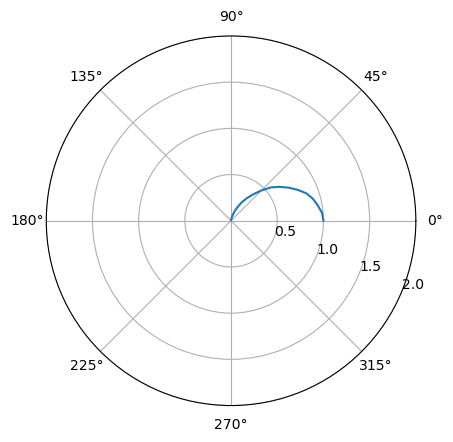

In [197]:
x = np.radians(malus['Angle (degrees)'])
y = malus['Current (micro amps)']/malus['Current (micro amps)'].max()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(x,y)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()

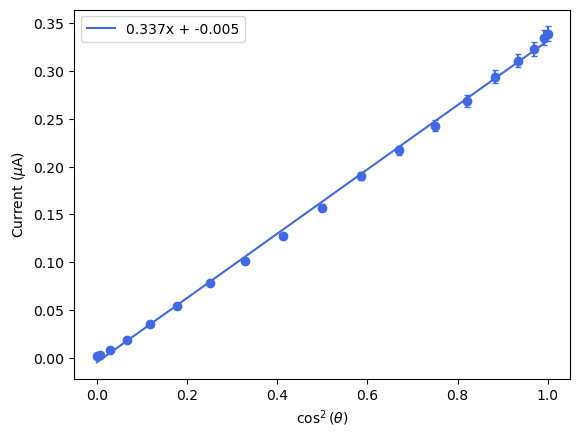

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming malus is defined and has the appropriate data
x = np.cos(np.radians(malus['Angle (degrees)']))**2
y = malus['Current (micro amps)']

# Scatter plot
plt.scatter(
    x,
    y,
    color='royalblue'
)

# Linear fit coefficients
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Plot the line of best fit
plt.plot(
    np.unique(x),
    np.poly1d(coefficients)(np.unique(x)),
    color='royalblue',
    label=f'{slope:.3f}x + {intercept:.3f}'
)

# Error bars
plt.errorbar(x, y, yerr=exp2n3_err * y, color='royalblue', capsize=2, fmt='none')

# Axis labels
plt.xlabel(r'$\cos^2(\theta)$')
plt.ylabel(r'Current ($\mu$A)')

# Show legend
plt.legend()

# Save the figure
plt.savefig("maluslawstraightline.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

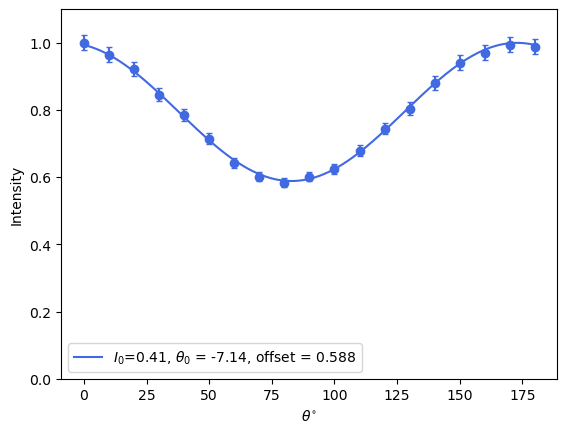

In [199]:
x = quarter['Angle']
y = quarter['Current (mA)']/quarter['Current (mA)'].max()

param,covariance = sp.curve_fit(cos,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = cos(x_smooth,*param)

plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=exp2n3_err*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Intensity')
plt.ylim(0,1.1)
plt.legend()
plt.savefig("quarterwaveplate.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()


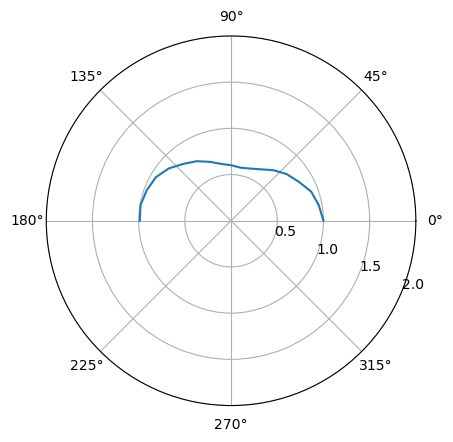

In [200]:
x = np.radians(quarter['Angle'])
y = quarter['Current (mA)']/quarter['Current (mA)'].max()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(x,y)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.savefig('quarterpolarplot.pgf')
plt.show()

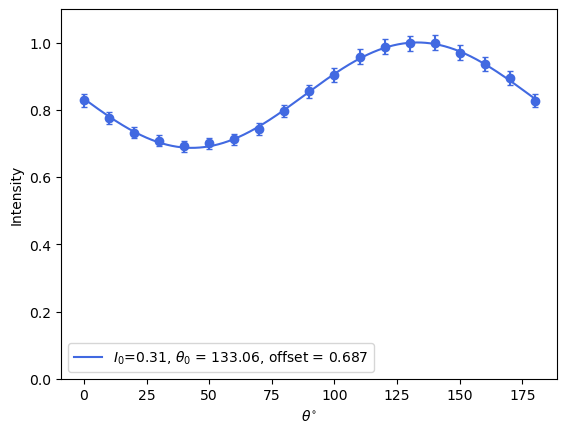

In [201]:
x = circular['Angle']
y = (circular['Current (10 micro amps)']/circular['Current (10 micro amps)'].max())

param,covariance = sp.curve_fit(cos,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = cos(x_smooth,*param)

plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=exp2n3_err*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Intensity')
plt.ylim(0,1.1)
plt.legend()
plt.savefig("circularwaveplate.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()


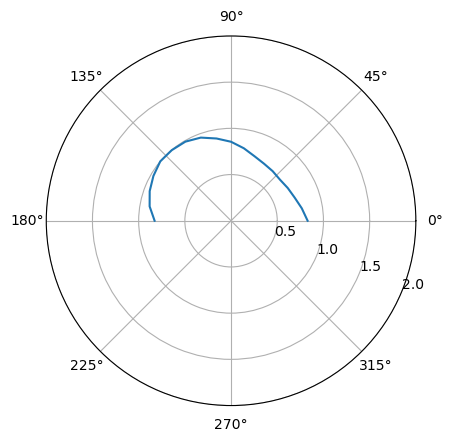

In [202]:
x = np.radians(circular['Angle'])
y = circular['Current (10 micro amps)']/circular['Current (10 micro amps)'].max()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(x,y)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.savefig('circpolarplot.pgf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


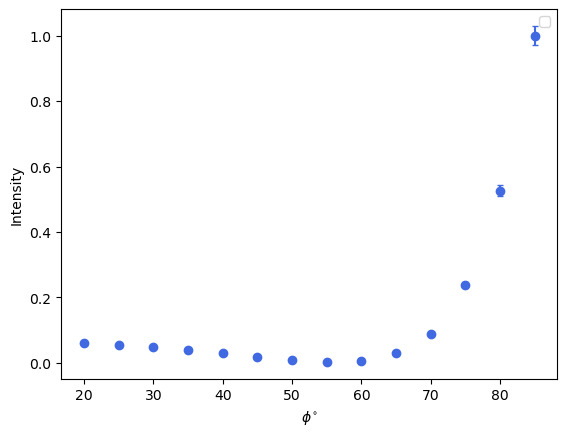

In [203]:
x = horizontal['Angle']+20
y = (horizontal['Intensity (100 micron)'] - horizontal['Background (10nA)']/10000)/horizontal['Intensity (100 micron)'].max()

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=exp4bh_error*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel(r'Intensity')

plt.legend()
plt.savefig("horizontalr_p.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


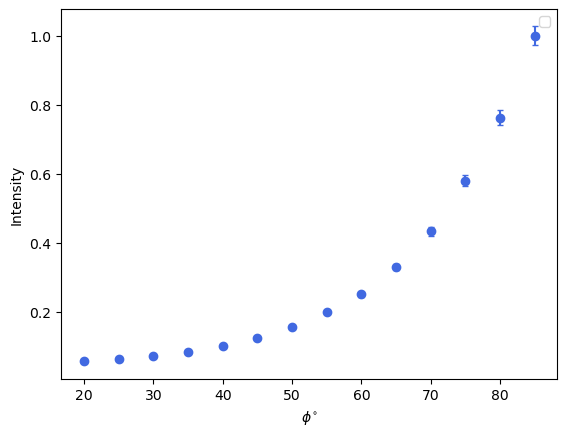

In [204]:
x = vertical['Angle']+20
y = (vertical['Intensity (100 micron)'] - vertical['Background (10nA)']/10000)/vertical['Intensity (100 micron)'].max()

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=exp4bv_error*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel(r'Intensity')

plt.legend()
plt.savefig("verticalr_s.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

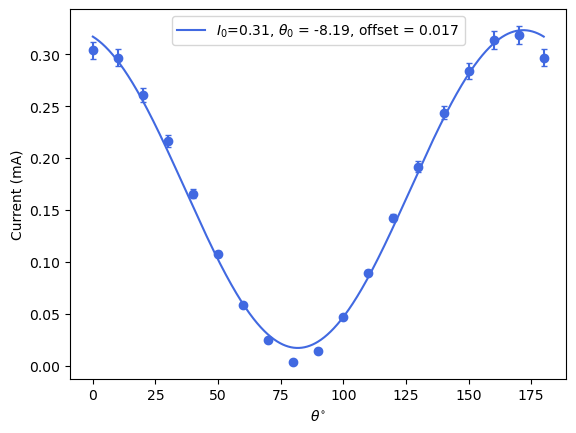

In [205]:
x = metal20['Angle']
y = metal20['Current(mA)'] - metal20['Background (10nA)']/10000

param,covariance = sp.curve_fit(cos,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = cos(x_smooth,*param)

plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=exp5_20_error*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current (mA)')

plt.legend()
plt.savefig("metal20.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()


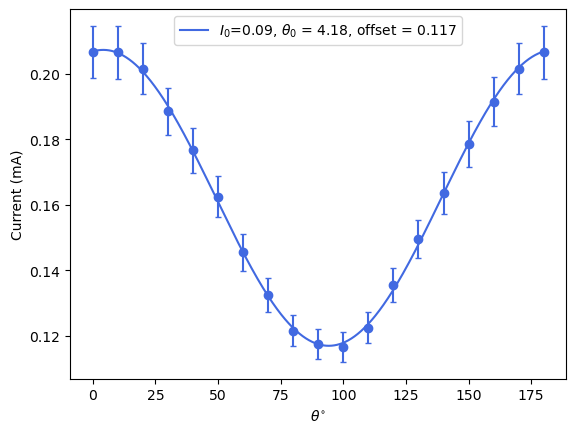

In [206]:
x = metal79['Angle']
y = metal79['Current(mA)'] - metal79['Background (10 nA)']/10000

param,covariance = sp.curve_fit(cos,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = cos(x_smooth,*param)

plt.plot(x_smooth,y_smooth,color='royalblue',label=rf'$I_0$={param[0]:.2f}, $\theta_0$ = {param[1]:.2f}, offset = {param[2]:.3f}')

plt.scatter(
    x,
    y,
    color='royalblue'
)

plt.errorbar(x,y,yerr=exp5_79_error*y,color='royalblue',capsize=2,fmt='none')

plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel(r'Current (mA)')

plt.legend()
plt.savefig("metal79.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()


In [207]:
from scipy.optimize import fsolve
import numpy as np

# Define the functions for fsolve
def equations(vars):
    x, y = vars
    eq1 = np.arctan(2 * x / (1 - x**2 - y**2)) - 0.216
    eq2 = ((1 - x)**2 + y**2) / ((1 + x)**2 + y**2) - 0.65
    return [eq1, eq2]

# Provide an initial guess for (x, y)
initial_guess = (0.5, 0.5)
solution = fsolve(equations, initial_guess)
print(solution)

[0.1078552  0.07271651]
